# L2 - Multilayer perceptron

### Papers
1. [TensorFlow](https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/45166.pdf)

### TensorFlow
1. [Installing TensorFlow](https://www.tensorflow.org/install/)
2. [Basics of TensorFlow](https://www.tensorflow.org/get_started/get_started)
3. [Mnist with TensorFlow](https://www.tensorflow.org/get_started/mnist/pros)
4. [TensorFlow Mechanics](https://www.tensorflow.org/get_started/mnist/mechanics)
5. [Visualization](https://www.tensorflow.org/get_started/graph_viz)


### One more thing
1. [Jupyter tutorial](https://habrahabr.ru/company/wunderfund/blog/316826/)
2. [Plot.ly](https://plot.ly/python/)
3. [Widgets](http://jupyter.org/widgets.html)

### 1. Linear multi-classification problem

We have already learned binary linear classifier
$$y = \text{sign}(w^Tx).$$
There are [several approaches](https://en.wikipedia.org/wiki/Multiclass_classification) to solve the problem of multi-class classification. For example [reduction](https://en.wikipedia.org/wiki/Multiclass_classification#Transformation_to_Binary) of problem to binary classifier or [modification](https://en.wikipedia.org/wiki/Support_vector_machine#Multiclass_SVM) of the known model. However we are interested in approaches that is applied in neural networks.

For each class $c \in 1, \dots, |C|$ we have an individual row $w_i$ of matrix $W$. Then the probability of $x$ belonging to a particular class is equal to
$$p_i = \frac{\exp(w^T_ix)}{\sum_j \exp(w^T_jx)}.$$
This is nothing, but [softmax](https://en.wikipedia.org/wiki/Softmax_function) function of $Wx$.
$$(p_1, \dots, p_{|C|}) = \text{softmax}(Wx).$$

If you look closely, $\text{softmax}$ is a more general variant of sigmoid. To see this, it suffices to consider the case $|C|=2$. As usual the training can be reduced to minimization of the empirical risk, namely, optimization problem
$$\arg\min_W Q(W) = \arg\min_W -\frac{1}{\mathcal{l}}\sum_y\sum_i [y = i] \cdot \ln(p_i(W)).$$
Actually, the maximization of the log-likelihood is written above.

#### Exercises
1. Find $\frac{dQ}{dW}$ in matrix form (hint: start with $\frac{dQ}{dw_i}$ for begining).
2. Please plot several mnist images (e.g using grid 5x5).
3. Train linear multi-label classifier for [mnist](https://www.kaggle.com/c/digit-recognizer) dataset with TensorFlow (possible, [this tutorial](https://www.tensorflow.org/get_started/mnist/pros) can help you).
4. Chek accuracy on train and validation sets.
5. Use a local [TensorBoard instance](https://www.tensorflow.org/get_started/graph_viz) to visualize resulted graph (no need to include in lab).

In [3]:
import tensorflow as tf
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


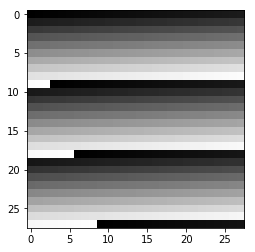

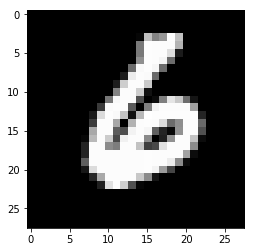

[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


In [4]:
def plot_image(image):
    image = np.array(image).reshape((28, 28))
    plt.imshow(image, cmap=cmap)
    plt.show()
image = np.array([x % 255 for x in range(28 * 28)])
cmap = 'gray'
plot_image(image)
plot_image(mnist.train.images[99])
print(mnist.train.labels[99])

validation accuracy 0.9252
test accuracy 0.9208


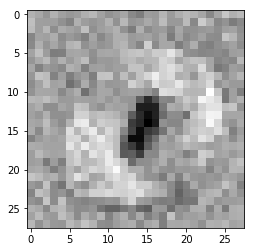

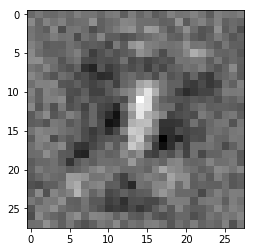

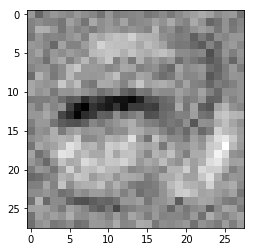

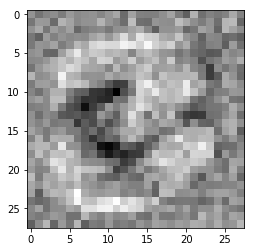

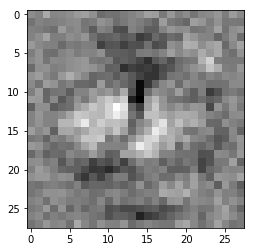

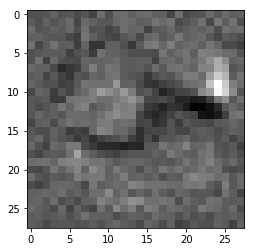

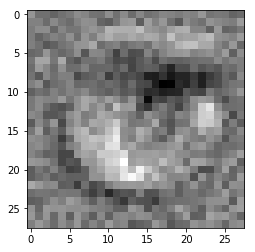

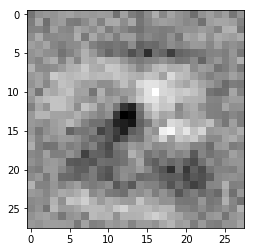

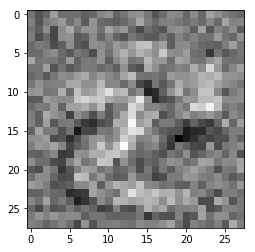

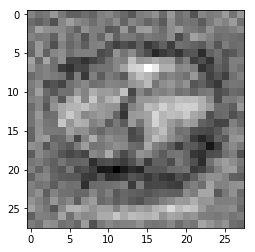

In [8]:
sess = tf.InteractiveSession()

x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

W = tf.Variable(tf.truncated_normal([784, 10], stddev=0.1))
b = tf.Variable(tf.constant(0.1, shape=[10]))
y = tf.matmul(x, W) + b

cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(2000):
        batch = mnist.train.next_batch(100)
        train_step.run(feed_dict={x: batch[0], y_: batch[1]})

    print('validation accuracy %g' % accuracy.eval(feed_dict={
        x: mnist.validation.images, y_: mnist.validation.labels}))
    print('test accuracy %g' % accuracy.eval(feed_dict={
        x: mnist.test.images, y_: mnist.test.labels}))
    result = sess.run(W)
    for i in range(10):
        plot_image(result.T[i])
        

Let's briefly touch on themes of regularization. As was discussed before, there are different approaches. We focus on the modification of loss function.

$$\arg\min_W -\frac{1}{\mathcal{l}}\sum_y\sum_i [y = i] \cdot \ln(p_i(W)) + \lambda_1 L_1(W) + \lambda_2 L_2(W)$$

1. $L_1(W) = sum_{i,j} |w_{i,j}|$ - sparsify weights (force to not use uncorrelated features)
2. $L_2(W) = sum_{i,j} w_{i,j}^2$ - minimize weights (force to not overfit)

#### Exercises
1. Train model again using both type of regularization.
2. Plot matrix of weights.
3. Which pixels have zero weights? What does it mean?
4. Have you improved accuracy on validation?

validation accuracy 0.8702
test accuracy 0.8677
part of matrix of weights:
[[  8.42574313e-02  -9.00411829e-02  -5.06961206e-03   5.42736799e-03
   -7.93852285e-03  -5.05094007e-02  -8.60140696e-02   6.97837025e-02
    5.18206619e-02   4.96772723e-03]
 [  7.67073259e-02  -4.69446145e-02  -2.62559555e-03   5.99187333e-04
   -6.05960051e-03  -2.19472405e-02  -2.22105384e-02   2.45163739e-02
    1.07525066e-01  -2.42656260e-03]
 [  1.00983888e-01  -4.66785114e-03  -1.43949338e-03  -1.09093636e-03
   -2.60567968e-03  -5.86348958e-03  -7.42287561e-03   5.82400663e-03
    1.15978047e-01  -4.11765557e-03]
 [  6.93412572e-02  -1.19276578e-04  -1.03358249e-03   3.37456324e-04
   -3.12404998e-04  -2.62813619e-03  -1.05220568e-03   3.55762313e-04
    5.10929674e-02  -1.16191362e-03]
 [  3.72695457e-03   2.26585369e-04  -8.13997875e-04  -4.16926399e-04
    6.77297183e-04   7.30727287e-03  -2.31839076e-04  -1.88674778e-04
    1.02440594e-03  -1.31898036e-04]
 [ -6.25822286e-04   2.28913268e-05  -8.

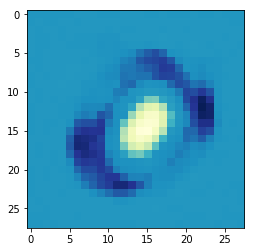

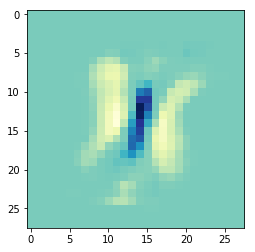

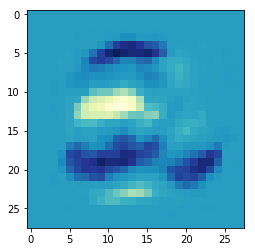

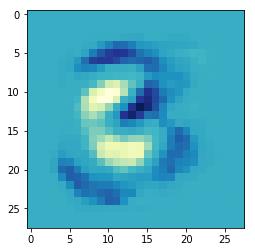

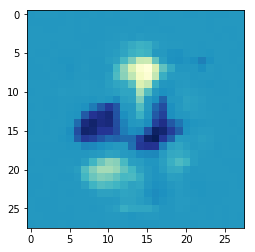

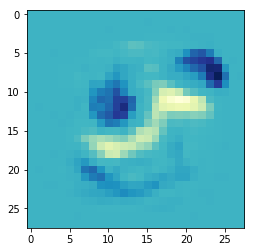

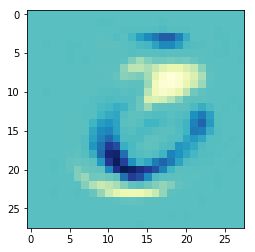

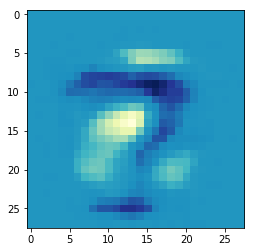

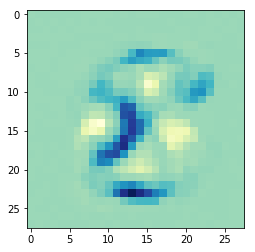

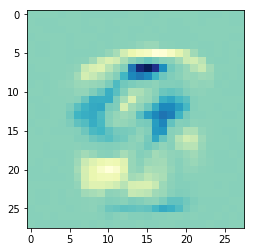

In [9]:
sess = tf.InteractiveSession()

x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

# W = tf.Variable(tf.zeros([784, 10]))
# b = tf.Variable(tf.zeros([10]))
W = tf.Variable(tf.truncated_normal([784, 10], stddev=0.1))
b = tf.Variable(tf.constant(0.1, shape=[10]))
y = tf.matmul(x, W) + b

lambda_1 = 0.0017
L_1 = tf.reduce_sum(tf.abs(W))
lambda_2 = 0.007
L_2 = tf.reduce_sum(tf.square(W))

cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y)) + lambda_1 * L_1 + lambda_2 * L_2

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(2000):
        batch = mnist.train.next_batch(100)
        train_step.run(feed_dict={x: batch[0], y_: batch[1]})

    print('validation accuracy %g' % accuracy.eval(feed_dict={
        x: mnist.validation.images, y_: mnist.validation.labels}))
    print('test accuracy %g' % accuracy.eval(feed_dict={
        x: mnist.test.images, y_: mnist.test.labels}))
    result = sess.run(W)
    print('part of matrix of weights:')
    print(result[300:310])
    cmap = 'YlGnBu'
    for i in range(10):
        plot_image(result.T[i])
        

### 2. Universal approximation theorem

What if we add more layers to our model? Namely, we train two matrix $W_2$ and $W_1$
$$softmax(W_2\cdot(W_1x)).$$

At first glance adding more parameters helps to increase the generalizing ability of the model. Buy actually we have the same model $softmax(Wx)$, where $W = W_2\cdot W_1$. But everyting changes with adding ome more layer. Let's add nonlinear function $\sigma$ between $W_2$ and $W_1$

$$softmax(W_2\cdot \sigma(W_1x)).$$

Kurt Hornik showed in 1991 that it is not the specific choice of the nonlinear function, but rather the multilayer feedforward architecture itself which gives neural networks the potential of being universal approximators. The output units are always assumed to be linear. For notational convenience, only the single output case will be shown. The general case can easily be deduced from the single output case.

Let $\sigma(\cdot)$ be a nonconstant, bounded, and monotonically-increasing continuous function.
Let $\mathcal{S}_m \subset \mathbb{R}^m$ denote any compact set. 
Then, given any $\varepsilon > 0$ and any coninuous function $f$ on $\mathcal{S}_m$, there exist an integer $N$ and real constants $v_i$, $b_i$ amd real vectors $w_i$ that

$$\left| \sum _{i=1}^{N}v_{i}\sigma \left( w_i^{T} x+b_i \right) - f(x) \right| < \varepsilon, ~~~ \forall x \in \mathcal{S}_m.$$

The theorem has non-constructive proof, it meams that no estimates for $N$ and no method to find approximation's parameters.

#### Exercises
1. Let $\sigma$ – [heaviside step function](https://en.wikipedia.org/wiki/Heaviside_step_function) and $x \in \{0, 1\}^2$. Prove that $y = \sigma(wx + b)$ can approximate boolean function **OR** (hint: use constructive proof).
2. What about **AND** function?
3. Is it possible to implement **XOR**? Prove your words.
4. Prove that 2-layer network can implement any boolean function.

#### More useful facts:
1. A 2-layer network in in $\mathbb{R}^n$ allows to define convex polyhedron..
2. A 3-layer network in в $\mathbb{R}^n$ allows to define a not necessarily convex and not even necessarily connected area.

### 3. Backpropagation
Backpropagation is a method used to calculate the error contribution of each layer after a batch of data. It is a special case of an older and more general technique called automatic differentiation. In the context of learning, backpropagation is commonly used by the gradient descent optimization algorithm to adjust the weight of layers by calculating the gradient of the loss function. This technique is also sometimes called backward propagation of errors, because the error is calculated at the output and distributed back through the network layers. The main motivation of method is simplify evaluation of gradient which is complex problem for multilayer nets.

We need the following notation. Let $(y^1,\dots,y^n) = f(x^1,\dots,x^n)$ is some differentiable function and $\frac{dy}{dx}$ is matrix
$$\frac{dy}{dx} = \Big[ J_{ij} = \frac{\partial y^i}{\partial x^j} \Big]$$

Without violating the generality, we can assume that each layer is a function $x_{i} = f(x_{i-1}, w_i)$. As last layer we add loss function, so we can assume our multi-layer net as function $Q(x_0) = Q(f_n(f_{n-1}(\dots, w_{n-1}), w_n))$.

#### Forward step
Propagation forward through the network to generate the output values. Calculation of the loss function.

#### Backward step
Let's look at last layer. We can simply find $\frac{dQ}{dx_n}$. Now we can evaluate 

$$\frac{dQ}{dw_n} = \frac{dQ}{dx_n}\frac{dx_n}{dw_n} \text{ and } \frac{dQ}{dx_{n-1}} = \frac{dQ}{dx_n}\frac{dx_n}{dx_{n-1}}$$

Now we need calculate $\frac{dQ}{dw_{n-2}}$ и $\frac{dQ}{dx_{n-2}}$. But we have the same situation. We know $\frac{dQ}{dx_k}$, so can evaluate $\frac{dQ}{dw_k}$ and $\frac{dQ}{dx_{k-1}}$. Repeating this operation we find all the gradients. Now it's only remains to make a gradient step to update weights.

#### Exercises
1. Read more about [vanishing gradient](https://en.wikipedia.org/wiki/Vanishing_gradient_problem).
2. Train 2 layer net. Use sigmoid as nonlinearity.
3. Check accuracy on validation set.
4. Use [ReLu](https://en.wikipedia.org/wiki/Rectifier_(neural_networks) or LeakyReLu as nonlinearity. Compare accuracy and convergence with previous model.
5. Play with different architectures (add more layers, regularization and etc).
6. Show your best model.
7. How does quality change with adding layers. Prove your words, train model for 2, 3, 5, 7 and 10 layers.
8. Using backpropagation find optimal  digit 8 for your net.*

In [11]:
# sigmoid as nonlinearity

sess = tf.InteractiveSession()

x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

W_1 = tf.Variable(tf.truncated_normal([784, 200], stddev=0.1))
b_1 = tf.Variable(tf.constant(0.1, shape=[200]))
layer_1 = tf.sigmoid(tf.matmul(x, W_1) + b_1)

W_2 = tf.Variable(tf.truncated_normal([200, 10], stddev=0.1))
b_2 = tf.Variable(tf.constant(0.1, shape=[10]))
layer_2 = tf.matmul(layer_1, W_2) + b_2

cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=layer_2))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(layer_2, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(2000):
        batch = mnist.train.next_batch(100)
        if i % 200 == 0:
            train_accuracy = accuracy.eval(feed_dict={
                x: batch[0], y_: batch[1]})
            print('step %d, training accuracy %g' % (i, train_accuracy))
        train_step.run(feed_dict={x: batch[0], y_: batch[1]})

    print('validation accuracy %g' % accuracy.eval(feed_dict={
        x: mnist.validation.images, y_: mnist.validation.labels}))
    print('test accuracy %g' % accuracy.eval(feed_dict={
        x: mnist.test.images, y_: mnist.test.labels}))
    
sess.close()

step 0, training accuracy 0.08
step 200, training accuracy 0.82
step 400, training accuracy 0.89
step 600, training accuracy 0.9
step 800, training accuracy 0.92
step 1000, training accuracy 0.91
step 1200, training accuracy 0.93
step 1400, training accuracy 0.93
step 1600, training accuracy 0.95
step 1800, training accuracy 0.97
validation accuracy 0.9484
test accuracy 0.9468


In [13]:
# ReLu as nonlinearity

sess = tf.InteractiveSession()

x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

W_1 = tf.Variable(tf.truncated_normal([784, 200], stddev=0.1))
b_1 = tf.Variable(tf.constant(0.1, shape=[200]))
layer_1 = tf.nn.relu(tf.matmul(x, W_1) + b_1)

W_2 = tf.Variable(tf.truncated_normal([200, 10], stddev=0.1))
b_2 = tf.Variable(tf.constant(0.1, shape=[10]))
layer_2 = tf.matmul(layer_1, W_2) + b_2

cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=layer_2))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(layer_2, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(2000):
        batch = mnist.train.next_batch(100)
        if i % 200 == 0:
            train_accuracy = accuracy.eval(feed_dict={
                x: batch[0], y_: batch[1]})
            print('step %d, training accuracy %g' % (i, train_accuracy))
        train_step.run(feed_dict={x: batch[0], y_: batch[1]})

    print('validation accuracy %g' % accuracy.eval(feed_dict={
        x: mnist.validation.images, y_: mnist.validation.labels}))
    print('test accuracy %g' % accuracy.eval(feed_dict={
        x: mnist.test.images, y_: mnist.test.labels}))
    
sess.close()

step 0, training accuracy 0.1
step 200, training accuracy 0.92
step 400, training accuracy 0.96
step 600, training accuracy 0.96
step 800, training accuracy 0.96
step 1000, training accuracy 0.97
step 1200, training accuracy 0.98
step 1400, training accuracy 0.96
step 1600, training accuracy 0.98
step 1800, training accuracy 0.99
validation accuracy 0.9764
test accuracy 0.9766


In [14]:
# testing n-layer nets

def n_layer_net(size):
    n = size
    sess = tf.InteractiveSession()

    x = tf.placeholder(tf.float32, [None, 784])
    y_ = tf.placeholder(tf.float32, [None, 10])
    
    sizes = np.array([784 - (x * 784 // n) for x in range(n + 1)])
    sizes[-1] = 10
    
    prev_layer = x
    
    for i in range(n - 1):
        W = tf.Variable(tf.truncated_normal([sizes[i], sizes[i + 1]], stddev=0.1))
        b = tf.Variable(tf.constant(0.1, shape=[sizes[i + 1]]))
        prev_layer = tf.nn.relu(tf.matmul(prev_layer, W) + b)

    W_last = tf.Variable(tf.truncated_normal([sizes[-2], sizes[-1]], stddev=0.1))
    b_last = tf.Variable(tf.constant(0.1, shape=[10]))
    last_layer = tf.matmul(prev_layer, W_last) + b_last

    cross_entropy = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=last_layer))

    train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
    correct_prediction = tf.equal(tf.argmax(last_layer, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for i in range(2000):
            batch = mnist.train.next_batch(100)
            if i % 1000 == 0:
                train_accuracy = accuracy.eval(feed_dict={
                    x: batch[0], y_: batch[1]})
                print('step %d, training accuracy %g' % (i, train_accuracy))
            train_step.run(feed_dict={x: batch[0], y_: batch[1]})

        print('validation accuracy for %d layers %g' % (n, accuracy.eval(feed_dict={
            x: mnist.validation.images, y_: mnist.validation.labels})))
        print('\033[1m test accuracy for %d layers %g \033[0m' % (n, accuracy.eval(feed_dict={
            x: mnist.test.images, y_: mnist.test.labels})))

    sess.close()
    
F = [2, 3, 5, 7, 10]
for i in F:
    print('number of layers \033[1m %d \033[0m' % i)
    n_layer_net(i)

number of layers  2 
step 0, training accuracy 0.21
step 1000, training accuracy 0.98
validation accuracy for 2 layers 0.9754
 test accuracy for 2 layers 0.9762 
number of layers  3 
step 0, training accuracy 0.05
step 1000, training accuracy 1
validation accuracy for 3 layers 0.9788
 test accuracy for 3 layers 0.9752 
number of layers  5 
step 0, training accuracy 0.16
step 1000, training accuracy 0.08
validation accuracy for 5 layers 0.0958
 test accuracy for 5 layers 0.098 
number of layers  7 
step 0, training accuracy 0.14
step 1000, training accuracy 0.16
validation accuracy for 7 layers 0.0958
 test accuracy for 7 layers 0.098 
number of layers  10 
step 0, training accuracy 0.08
step 1000, training accuracy 0.06
validation accuracy for 10 layers 0.0958
 test accuracy for 10 layers 0.098 


In [15]:
# Let's play with nonlinearity function, number of batches, number of layers and regularization

def net_flexible(nonlinearity, batches_step, steps, layers_num, regularization):
    sess = tf.InteractiveSession()

    x = tf.placeholder(tf.float32, [None, 784])
    y_ = tf.placeholder(tf.float32, [None, 10])
    
    sizes = np.array([784 - (x * 784 // layers_num) for x in range(layers_num + 1)])
    sizes[-1] = 10
    
    prev_layer = x
    
    for i in range(layers_num - 1):
        W = tf.Variable(tf.truncated_normal([sizes[i], sizes[i + 1]], stddev=0.1))
        b = tf.Variable(tf.constant(0.1, shape=[sizes[i + 1]]))
        prev_layer = nonlinearity(tf.matmul(prev_layer, W) + b)

    W_last = tf.Variable(tf.truncated_normal([sizes[-2], sizes[-1]], stddev=0.1))
    b_last = tf.Variable(tf.constant(0.1, shape=[10]))
    last_layer = tf.matmul(prev_layer, W_last) + b_last

    lambda_1 = 0.0017
    lambda_2 = 0.007
    W_1 = tf.reduce_sum(tf.abs(W_last))
    W_2 = tf.reduce_sum(tf.square(W_last))
    
    cross_entropy = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=last_layer)) +\
        regularization * (lambda_1 * W_1 + lambda_2 * W_2)

    train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
    correct_prediction = tf.equal(tf.argmax(last_layer, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for i in range(steps):
            batch = mnist.train.next_batch(batches_step)
            if i == steps//2:
                train_accuracy = accuracy.eval(feed_dict={
                    x: batch[0], y_: batch[1]})
                print('step %d, training accuracy %g' % (i, train_accuracy))
            train_step.run(feed_dict={x: batch[0], y_: batch[1]})

        print('validation accuracy %g' % accuracy.eval(feed_dict={
            x: mnist.validation.images, y_: mnist.validation.labels}))
        print('\033[1m test accuracy %g \033[0m' % accuracy.eval(feed_dict={
            x: mnist.test.images, y_: mnist.test.labels}))

    sess.close()

In [22]:
# we have our best accuracy when we have 3-layer-net with Relu as nonlinearity
# training by 10000 steps without regularization (and batch_step is 100)
# then let's train our model to find optimal digit 8 for our net
# (checked in the end of file)

print('\033[1m Nonlinearity: ReLu, batches: 100, steps: 10000, layers: 3, regularization: false\033[0m')
# net_flexible(tf.nn.relu, 100, 10000, 3, 0);


 Nonlinearity: ReLu, batches: 100, steps: 10000, layers: 3, regularization: false


### 4. Autoencoders
An autoencoder is an network used for unsupervised learning of efficient codings. The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for the purpose of dimensionality reduction. Also, this technique can be used to train deep nets.

Architecturally, the simplest form of an autoencoder is a feedforward net very similar to the multilayer perceptron (MLP), but with the output layer having the same number of nodes as the input layer, and with the purpose of reconstructing its own inputs. Therefore, autoencoders are unsupervised learning models. An autoencoder always consists of two parts, the encoder and the decoder. Encoder returns latent representation of the object (compressed representation, usuallu smaller dimension), but decoder restores object from this latent representation. Autoencoders are also trained to minimise reconstruction errors (e.g. MSE).

Various techniques exist to prevent autoencoders from learning the identity and to improve their ability to capture important information:
1. Denoising autoencoder - take a partially corrupted input.
2. Sparse autoencoder - impose sparsity on the hidden units during training (whilst having a larger number of hidden units than inputs).
3. Variational autoencoder models inherit autoencoder architecture, but make strong assumptions concerning the distribution of latent variables.
4. Contractive autoencoder - add an explicit regularizer in objective function that forces the model to learn a function that is robust to slight variations of input values.

#### Exercises
1. Train 2 layers autoencoder that compressed mnist images to $\mathbb{R}^3$ space.
2. For each digit plot several samples in 3D axis (use "%matplotlib notebook" mode or plotly). How do digits group?
3. Train autoencoder with more layers. What are results?
4. Use autoencoder to pretrain 2 layers (unsupervised) and then train the following layers with supervised method.

In [ ]:
# import tensorflow as tf
# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# x = tf.placeholder(tf.float32, [None, 784])
# W = tf.Variable(tf.zeros([784, 10]))
# b = tf.Variable(tf.zeros([10]))
# y = tf.nn.softmax(tf.matmul(x, W) + b)

# y_ = tf.placeholder(tf.float32, [None, 10])
# cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
# train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

# sess = tf.InteractiveSession()
# tf.global_variables_initializer().run()

# for _ in range(1000):
#     batch_xs, batch_ys = mnist.train.next_batch(100)
#     sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    
# correct_prediction = tf.equal(tf.argmax(y_, 1), tf.argmax(y, 1))
# accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

In [ ]:
# import tensorflow as tf
# sess = tf.InteractiveSession()

# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# x = tf.placeholder(tf.float32, [None, 784])
# y_ = tf.placeholder(tf.float32, [None, 10])

# W = tf.Variable(tf.zeros([784, 10]))
# b = tf.Variable(tf.zeros([10]))
# y = tf.nn.softmax(tf.matmul(x, W) + b)

# cross_entropy = tf.reduce_mean(
#     tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
# train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

# tf.global_variables_initializer().run()

# for _ in range(1000):
#     batch = mnist.train.next_batch(100)
#     train_step.run(feed_dict={x: batch[0], y_: batch[1]})
    
# correct_prediction = tf.equal(tf.argmax(y_, 1), tf.argmax(y, 1))
# accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

# def deep_mnist_tutorial():
#     def weight_variable(shape):
#         initial = tf.truncated_normal(shape, stddev=0.1)
#         return tf.Variable(initial)

#     def bias_variable(shape):
#         initial = tf.constant(0.1, shape=shape)
#         return tf.Variable(initial)

#     def conv2d(x, W):
#         return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

#     def max_pool_2x2(x):
#         return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
#                              strides=[1, 2, 2, 1], padding='SAME')

#     W_conv1 = weight_variable([5, 5, 1, 32])
#     b_conv1 = bias_variable([32])

#     x_image = tf.reshape(x, [-1, 28, 28, 1])
#     h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
#     h_pool1 = max_pool_2x2(h_conv1)

#     W_conv2 = weight_variable([5, 5, 32, 64])
#     b_conv2 = bias_variable([64])

#     h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
#     h_pool2 = max_pool_2x2(h_conv2)

#     W_fc1 = weight_variable([7 * 7 * 64, 1024])
#     b_fc1 = bias_variable([1024])

#     h_pool2_flat = tf.reshape(h_pool2, [-1, 7 * 7 * 64])
#     h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

#     keep_prob = tf.placeholder(tf.float32)
#     h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

#     W_fc2 = weight_variable([1024, 10])
#     b_fc2 = bias_variable([10])

#     y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

#     cross_entropy = tf.reduce_mean(
#         tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
#     train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
#     correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
#     accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#     with tf.Session() as sess:
#         sess.run(tf.global_variables_initializer())
#         for i in range(20000):
#             batch = mnist.train.next_batch(50)
#             if i % 100 == 0:
#                 train_accuracy = accuracy.eval(feed_dict={
#                     x: batch[0], y_: batch[1], keep_prob: 1.0})
#                 print('step %d, training accuracy %g' % (i, train_accuracy))
#             train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

#         print('test accuracy %g' % accuracy.eval(feed_dict={
#             x: mnist.test.images, y_: mnist.test.labels, keep_prob: 0.5}))

In [16]:
print('\033[1m Nonlinearity: ReLu, batches: 50, steps: 2000, layers: 2, regularization: false\033[0m')
net_flexible(tf.nn.relu, 50, 2000, 2, 0);
print('\033[1m Nonlinearity: sigmoid, batches: 50, steps: 2000, layers: 2, regularization: false\033[0m')
net_flexible(tf.sigmoid, 50, 2000, 2, 0);
print('\033[1m Nonlinearity: ReLu, batches: 50, steps: 2000, layers: 2, regularization: true\033[0m')
net_flexible(tf.nn.relu, 50, 2000, 2, 1);
print('\033[1m Nonlinearity: sigmoid, batches: 50, steps: 2000, layers: 2, regularization: true\033[0m')
net_flexible(tf.sigmoid, 50, 2000, 2, 1);
print('\033[1m Nonlinearity: ReLu, batches: 50, steps: 2000, layers: 3, regularization: false\033[0m')
net_flexible(tf.nn.relu, 50, 2000, 3, 0);
print('\033[1m Nonlinearity: sigmoid, batches: 50, steps: 2000, layers: 3, regularization: false\033[0m')
net_flexible(tf.sigmoid, 50, 2000, 3, 0);
print('\033[1m Nonlinearity: ReLu, batches: 50, steps: 2000, layers: 3, regularization: true\033[0m')
net_flexible(tf.nn.relu, 50, 2000, 3, 1);
print('\033[1m Nonlinearity: sigmoid, batches: 50, steps: 2000, layers: 3, regularization: true\033[0m')
net_flexible(tf.sigmoid, 50, 2000, 3, 1);

 Nonlinearity: ReLu, batches: 50, steps: 2000, layers: 2, regularization: false
step 1000, training accuracy 0.94
validation accuracy 0.9754
 test accuracy 0.9719 
 Nonlinearity: sigmoid, batches: 50, steps: 2000, layers: 2, regularization: false
step 1000, training accuracy 0.84
validation accuracy 0.9484
 test accuracy 0.9425 
 Nonlinearity: ReLu, batches: 50, steps: 2000, layers: 2, regularization: true
step 1000, training accuracy 0.98
validation accuracy 0.929
 test accuracy 0.9261 
 Nonlinearity: sigmoid, batches: 50, steps: 2000, layers: 2, regularization: true
step 1000, training accuracy 0.76
validation accuracy 0.9028
 test accuracy 0.9038 
 Nonlinearity: ReLu, batches: 50, steps: 2000, layers: 3, regularization: false
step 1000, training accuracy 0.9
validation accuracy 0.9744
 test accuracy 0.9696 
 Nonlinearity: sigmoid, batches: 50, steps: 2000, layers: 3, regularization: false
step 1000, training accuracy 0.88
validation accuracy 0.944
 test accuracy 0.9362 
 Nonlinearit

In [17]:
print('\033[1m Nonlinearity: ReLu, batches: 100, steps: 2000, layers: 2, regularization: false\033[0m')
net_flexible(tf.nn.relu, 100, 2000, 2, 0);
print('\033[1m Nonlinearity: sigmoid, batches: 100, steps: 2000, layers: 2, regularization: false\033[0m')
net_flexible(tf.sigmoid, 100, 2000, 2, 0);
print('\033[1m Nonlinearity: ReLu, batches: 100, steps: 2000, layers: 2, regularization: true\033[0m')
net_flexible(tf.nn.relu, 100, 2000, 2, 1);
print('\033[1m Nonlinearity: sigmoid, batches: 100, steps: 2000, layers: 2, regularization: true\033[0m')
net_flexible(tf.sigmoid, 100, 2000, 2, 1);
print('\033[1m Nonlinearity: ReLu, batches: 100, steps: 2000, layers: 3, regularization: false\033[0m')
net_flexible(tf.nn.relu, 100, 2000, 3, 0);
print('\033[1m Nonlinearity: sigmoid, batches: 100, steps: 2000, layers: 3, regularization: false\033[0m')
net_flexible(tf.sigmoid, 100, 2000, 3, 0);
print('\033[1m Nonlinearity: ReLu, batches: 100, steps: 2000, layers: 3, regularization: true\033[0m')
net_flexible(tf.nn.relu, 100, 2000, 3, 1);
print('\033[1m Nonlinearity: sigmoid, batches: 100, steps: 2000, layers: 3, regularization: true\033[0m')
net_flexible(tf.sigmoid, 100, 2000, 3, 1);

 Nonlinearity: ReLu, batches: 100, steps: 2000, layers: 2, regularization: false
step 1000, training accuracy 0.98
validation accuracy 0.976
 test accuracy 0.9737 
 Nonlinearity: sigmoid, batches: 100, steps: 2000, layers: 2, regularization: false
step 1000, training accuracy 0.94
validation accuracy 0.9496
 test accuracy 0.9477 
 Nonlinearity: ReLu, batches: 100, steps: 2000, layers: 2, regularization: true
step 1000, training accuracy 0.97
validation accuracy 0.9492
 test accuracy 0.9471 
 Nonlinearity: sigmoid, batches: 100, steps: 2000, layers: 2, regularization: true
step 1000, training accuracy 0.81
validation accuracy 0.9122
 test accuracy 0.9109 
 Nonlinearity: ReLu, batches: 100, steps: 2000, layers: 3, regularization: false
step 1000, training accuracy 0.95
validation accuracy 0.978
 test accuracy 0.9738 
 Nonlinearity: sigmoid, batches: 100, steps: 2000, layers: 3, regularization: false
step 1000, training accuracy 0.96
validation accuracy 0.9458
 test accuracy 0.9421 
 Nonl

In [18]:
print('\033[1m Nonlinearity: ReLu, batches: 200, steps: 2000, layers: 2, regularization: false\033[0m')
net_flexible(tf.nn.relu, 200, 2000, 2, 0);
print('\033[1m Nonlinearity: sigmoid, batches: 200, steps: 2000, layers: 2, regularization: false\033[0m')
net_flexible(tf.sigmoid, 200, 2000, 2, 0);
print('\033[1m Nonlinearity: ReLu, batches: 200, steps: 2000, layers: 2, regularization: true\033[0m')
net_flexible(tf.nn.relu, 200, 2000, 2, 1);
print('\033[1m Nonlinearity: sigmoid, batches: 200, steps: 2000, layers: 2, regularization: true\033[0m')
net_flexible(tf.sigmoid, 200, 2000, 2, 1);
print('\033[1m Nonlinearity: ReLu, batches: 200, steps: 2000, layers: 3, regularization: false\033[0m')
net_flexible(tf.nn.relu, 200, 2000, 3, 0);
print('\033[1m Nonlinearity: sigmoid, batches: 200, steps: 2000, layers: 3, regularization: false\033[0m')
net_flexible(tf.sigmoid, 200, 2000, 3, 0);
print('\033[1m Nonlinearity: ReLu, batches: 200, steps: 2000, layers: 3, regularization: true\033[0m')
net_flexible(tf.nn.relu, 200, 2000, 3, 1);
print('\033[1m Nonlinearity: sigmoid, batches: 200, steps: 2000, layers: 3, regularization: true\033[0m')
net_flexible(tf.sigmoid, 200, 2000, 3, 1);

 Nonlinearity: ReLu, batches: 200, steps: 2000, layers: 2, regularization: false
step 1000, training accuracy 0.98
validation accuracy 0.9792
 test accuracy 0.976 
 Nonlinearity: sigmoid, batches: 200, steps: 2000, layers: 2, regularization: false
step 1000, training accuracy 0.95
validation accuracy 0.9496
 test accuracy 0.9467 
 Nonlinearity: ReLu, batches: 200, steps: 2000, layers: 2, regularization: true
step 1000, training accuracy 0.955
validation accuracy 0.956
 test accuracy 0.9501 
 Nonlinearity: sigmoid, batches: 200, steps: 2000, layers: 2, regularization: true
step 1000, training accuracy 0.875
validation accuracy 0.9136
 test accuracy 0.9111 
 Nonlinearity: ReLu, batches: 200, steps: 2000, layers: 3, regularization: false
step 1000, training accuracy 1
validation accuracy 0.9782
 test accuracy 0.9785 
 Nonlinearity: sigmoid, batches: 200, steps: 2000, layers: 3, regularization: false
step 1000, training accuracy 0.895
validation accuracy 0.95
 test accuracy 0.9463 
 Nonlin

In [19]:
print('\033[1m Nonlinearity: ReLu, batches: 50, steps: 10000, layers: 2, regularization: false\033[0m')
net_flexible(tf.nn.relu, 50, 10000, 2, 0);
print('\033[1m Nonlinearity: sigmoid, batches: 50, steps: 10000, layers: 2, regularization: false\033[0m')
net_flexible(tf.sigmoid, 50, 10000, 2, 0);
print('\033[1m Nonlinearity: ReLu, batches: 50, steps: 10000, layers: 2, regularization: true\033[0m')
net_flexible(tf.nn.relu, 50, 10000, 2, 1);
print('\033[1m Nonlinearity: sigmoid, batches: 50, steps: 10000, layers: 2, regularization: true\033[0m')
net_flexible(tf.sigmoid, 50, 10000, 2, 1);
print('\033[1m Nonlinearity: ReLu, batches: 50, steps: 10000, layers: 3, regularization: false\033[0m')
net_flexible(tf.nn.relu, 50, 10000, 3, 0);
print('\033[1m Nonlinearity: sigmoid, batches: 50, steps: 10000, layers: 3, regularization: false\033[0m')
net_flexible(tf.sigmoid, 50, 10000, 3, 0);
print('\033[1m Nonlinearity: ReLu, batches: 50, steps: 10000, layers: 3, regularization: true\033[0m')
net_flexible(tf.nn.relu, 50, 10000, 3, 1);
print('\033[1m Nonlinearity: sigmoid, batches: 50, steps: 10000, layers: 3, regularization: true\033[0m')
net_flexible(tf.sigmoid, 50, 10000, 3, 1);

 Nonlinearity: ReLu, batches: 50, steps: 10000, layers: 2, regularization: false
step 5000, training accuracy 1
validation accuracy 0.9844
 test accuracy 0.9829 
 Nonlinearity: sigmoid, batches: 50, steps: 10000, layers: 2, regularization: false
step 5000, training accuracy 1
validation accuracy 0.9792
 test accuracy 0.9765 
 Nonlinearity: ReLu, batches: 50, steps: 10000, layers: 2, regularization: true
step 5000, training accuracy 0.92
validation accuracy 0.9526
 test accuracy 0.9517 
 Nonlinearity: sigmoid, batches: 50, steps: 10000, layers: 2, regularization: true
step 5000, training accuracy 0.9
validation accuracy 0.9238
 test accuracy 0.9235 
 Nonlinearity: ReLu, batches: 50, steps: 10000, layers: 3, regularization: false
step 5000, training accuracy 0.98
validation accuracy 0.9806
 test accuracy 0.9785 
 Nonlinearity: sigmoid, batches: 50, steps: 10000, layers: 3, regularization: false
step 5000, training accuracy 0.92
validation accuracy 0.9764
 test accuracy 0.9709 
 Nonlinear

In [20]:
print('\033[1m Nonlinearity: ReLu, batches: 100, steps: 10000, layers: 2, regularization: false\033[0m')
net_flexible(tf.nn.relu, 100, 10000, 2, 0);
print('\033[1m Nonlinearity: sigmoid, batches: 100, steps: 10000, layers: 2, regularization: false\033[0m')
net_flexible(tf.sigmoid, 100, 10000, 2, 0);
print('\033[1m Nonlinearity: ReLu, batches: 100, steps: 10000, layers: 2, regularization: true\033[0m')
net_flexible(tf.nn.relu, 100, 10000, 2, 1);
print('\033[1m Nonlinearity: sigmoid, batches: 100, steps: 10000, layers: 2, regularization: true\033[0m')
net_flexible(tf.sigmoid, 100, 10000, 2, 1);
# best 0.9826
print('\033[1m Nonlinearity: ReLu, batches: 100, steps: 10000, layers: 3, regularization: false\033[0m')
net_flexible(tf.nn.relu, 100, 10000, 3, 0);
print('\033[1m Nonlinearity: sigmoid, batches: 100, steps: 10000, layers: 3, regularization: false\033[0m')
net_flexible(tf.sigmoid, 100, 10000, 3, 0);
print('\033[1m Nonlinearity: ReLu, batches: 100, steps: 10000, layers: 3, regularization: true\033[0m')
net_flexible(tf.nn.relu, 100, 10000, 3, 1);
print('\033[1m Nonlinearity: sigmoid, batches: 100, steps: 10000, layers: 3, regularization: true\033[0m')
net_flexible(tf.sigmoid, 100, 10000, 3, 1);

 Nonlinearity: ReLu, batches: 100, steps: 10000, layers: 2, regularization: false
step 5000, training accuracy 1
validation accuracy 0.9828
 test accuracy 0.9825 
 Nonlinearity: sigmoid, batches: 100, steps: 10000, layers: 2, regularization: false
step 5000, training accuracy 0.93
validation accuracy 0.9768
 test accuracy 0.9772 
 Nonlinearity: ReLu, batches: 100, steps: 10000, layers: 2, regularization: true
step 5000, training accuracy 0.93
validation accuracy 0.961
 test accuracy 0.96 
 Nonlinearity: sigmoid, batches: 100, steps: 10000, layers: 2, regularization: true
step 5000, training accuracy 0.91
validation accuracy 0.927
 test accuracy 0.9278 
 Nonlinearity: ReLu, batches: 100, steps: 10000, layers: 3, regularization: false
step 5000, training accuracy 1
validation accuracy 0.9848
 test accuracy 0.9826 
 Nonlinearity: sigmoid, batches: 100, steps: 10000, layers: 3, regularization: false
step 5000, training accuracy 0.97
validation accuracy 0.9776
 test accuracy 0.9733 
 Nonlin

In [21]:
print('\033[1m Nonlinearity: ReLu, batches: 200, steps: 10000, layers: 2, regularization: false\033[0m')
net_flexible(tf.nn.relu, 200, 10000, 2, 0);
print('\033[1m Nonlinearity: sigmoid, batches: 200, steps: 10000, layers: 2, regularization: false\033[0m')
net_flexible(tf.sigmoid, 200, 10000, 2, 0);
print('\033[1m Nonlinearity: ReLu, batches: 200, steps: 10000, layers: 2, regularization: true\033[0m')
net_flexible(tf.nn.relu, 200, 10000, 2, 1);
print('\033[1m Nonlinearity: sigmoid, batches: 200, steps: 10000, layers: 2, regularization: true\033[0m')
net_flexible(tf.sigmoid, 200, 10000, 2, 1);
print('\033[1m Nonlinearity: ReLu, batches: 200, steps: 10000, layers: 3, regularization: false\033[0m')
net_flexible(tf.nn.relu, 200, 10000, 3, 0);
print('\033[1m Nonlinearity: sigmoid, batches: 200, steps: 10000, layers: 3, regularization: false\033[0m')
net_flexible(tf.sigmoid, 200, 10000, 3, 0);
print('\033[1m Nonlinearity: ReLu, batches: 200, steps: 10000, layers: 3, regularization: true\033[0m')
net_flexible(tf.nn.relu, 200, 10000, 3, 1);
print('\033[1m Nonlinearity: sigmoid, batches: 200, steps: 10000, layers: 3, regularization: true\033[0m')
net_flexible(tf.sigmoid, 200, 10000, 3, 1);

 Nonlinearity: ReLu, batches: 200, steps: 10000, layers: 2, regularization: false
step 5000, training accuracy 1
validation accuracy 0.9816
 test accuracy 0.982 
 Nonlinearity: sigmoid, batches: 200, steps: 10000, layers: 2, regularization: false
step 5000, training accuracy 0.985
validation accuracy 0.9758
 test accuracy 0.9775 
 Nonlinearity: ReLu, batches: 200, steps: 10000, layers: 2, regularization: true
step 5000, training accuracy 0.955
validation accuracy 0.959
 test accuracy 0.9553 
 Nonlinearity: sigmoid, batches: 200, steps: 10000, layers: 2, regularization: true
step 5000, training accuracy 0.93
validation accuracy 0.9256
 test accuracy 0.9274 
 Nonlinearity: ReLu, batches: 200, steps: 10000, layers: 3, regularization: false
step 5000, training accuracy 1
validation accuracy 0.9828
 test accuracy 0.9824 
 Nonlinearity: sigmoid, batches: 200, steps: 10000, layers: 3, regularization: false
step 5000, training accuracy 0.955
validation accuracy 0.98
 test accuracy 0.976 
 Nonl